# Import Libraries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns



# Import and Process Data

In [94]:
world_hap_2015 = pd.read_csv('data/2015.csv')
world_hap_2016 = pd.read_csv('data/2016.csv')
world_hap_2017 = pd.read_csv('data/2017.csv')
world_hap_2018 = pd.read_csv('data/2018.csv')
world_hap_2019 = pd.read_csv('data/2019.csv')
country_and_region = world_hap_2015[['Country', 'Region']]

world_hap_2015.drop(columns=['Region', 'Happiness Rank', 'Standard Error'], inplace=True)
world_hap_2016.drop(columns=['Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
world_hap_2017.drop(columns=['Happiness.Rank', 'Whisker.high', 'Whisker.low'], inplace=True)
world_hap_2018.drop(columns=['Overall rank'], inplace=True)
world_hap_2019.drop(columns=['Overall rank'], inplace=True)

world_hap_2015.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Dystopia_Residual']
world_hap_2016.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Dystopia_Residual']

world_hap_2017.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom','Generosity', 'Corruption', 'Dystopia_Residual']
world_hap_2018.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']
world_hap_2019.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']

world_hap_2018['Dystopia_Residual'] = world_hap_2018['Happiness_Score'] - (world_hap_2018['GDP_per_Capita']+world_hap_2018['Social_Support']+world_hap_2018['Life_Expectancy']+world_hap_2018['Freedom']+world_hap_2018['Generosity']+world_hap_2018['Corruption'])
world_hap_2019['Dystopia_Residual'] = world_hap_2019['Happiness_Score'] - (world_hap_2019['GDP_per_Capita']+world_hap_2019['Social_Support']+world_hap_2019['Life_Expectancy']+world_hap_2019['Freedom']+world_hap_2019['Generosity']+world_hap_2019['Corruption'])

world_hap_2015['year'] = pd.to_datetime('2015', format='%Y')
world_hap_2016['year'] = pd.to_datetime('2016', format='%Y')
world_hap_2017['year'] = pd.to_datetime('2017', format='%Y')
world_hap_2018['year'] = pd.to_datetime('2018', format='%Y')
world_hap_2019['year'] = pd.to_datetime('2019', format='%Y')

world_hap = pd.concat([world_hap_2015, world_hap_2016, world_hap_2017, world_hap_2018, world_hap_2019])
world_hap = world_hap.merge(country_and_region, how='inner', on='Country')

world_hap.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(757, 11)

In [95]:
gdp_contribution = pd.read_csv('data/GDP_Contribution.csv')

In [96]:
world_hap = world_hap.merge(gdp_contribution, how='inner', on='Country')

In [97]:
# Access built-in Natural Earth data via GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get a list (dataframe) of country centroids
centroids = world.centroid
centroid_list = pd.concat([world.name, centroids], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


In [98]:
world_hap = world_hap.merge(centroid_list, how='inner', left_on='Country', right_on='name')

In [99]:
world_hap.head()

,Corruption,Country,Dystopia_Residual,Freedom,GDP_per_Capita,Generosity,Happiness_Score,Life_Expectancy,Social_Support,year,Region,Year,GDP,Agriculture,Industry,Manufacturing,Services,CAGR,name,0
0,0.419780,Switzerland,2.517380,0.665570,1.39651,0.296780,7.587,0.941430,1.349510,2015-01-01,Western Europe,2019,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174)
1,0.412030,Switzerland,2.694630,0.585570,1.52733,0.280830,7.509,0.863030,1.145240,2016-01-01,Western Europe,2019,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174)
2,0.367007,Switzerland,2.276716,0.620071,1.56498,0.290549,7.494,0.858131,1.516912,2017-01-01,Western Europe,2019,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174)
3,0.357000,Switzerland,2.318000,0.660000,1.42000,0.256000,7.487,0.927000,1.549000,2018-01-01,Western Europe,2019,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174)
4,0.343000,Switzerland,2.272000,0.572000,1.45200,0.263000,7.480,1.052000,1.526000,2019-01-01,Western Europe,2019,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174)


In [100]:
#Clean point column to split into latitude and longitude
world_hap.dtypes
pd.to_numeric(world_hap['GDP'])

0      703.1
1      703.1
2      703.1
3      703.1
4      703.1
       ...  
613      5.5
614      5.5
615      5.5
616      5.5
617      5.5
Name: GDP, Length: 618, dtype: float64

# Data Exploration

## Average Happiness by Region

In [101]:
world_hap.groupby('Region').agg({'Happiness_Score': np.nanmean}).sort_values(by='Happiness_Score', ascending=False)

,Happiness_Score
Region,
Australia and New Zealand,7.294600
Western Europe,6.802768
Latin America and Caribbean,6.081032
Middle East and Northern Africa,5.730424
Eastern Asia,5.391333
Central and Eastern Europe,5.363357
Southeastern Asia,5.224714
Southern Asia,4.580657
Sub-Saharan Africa,4.129092


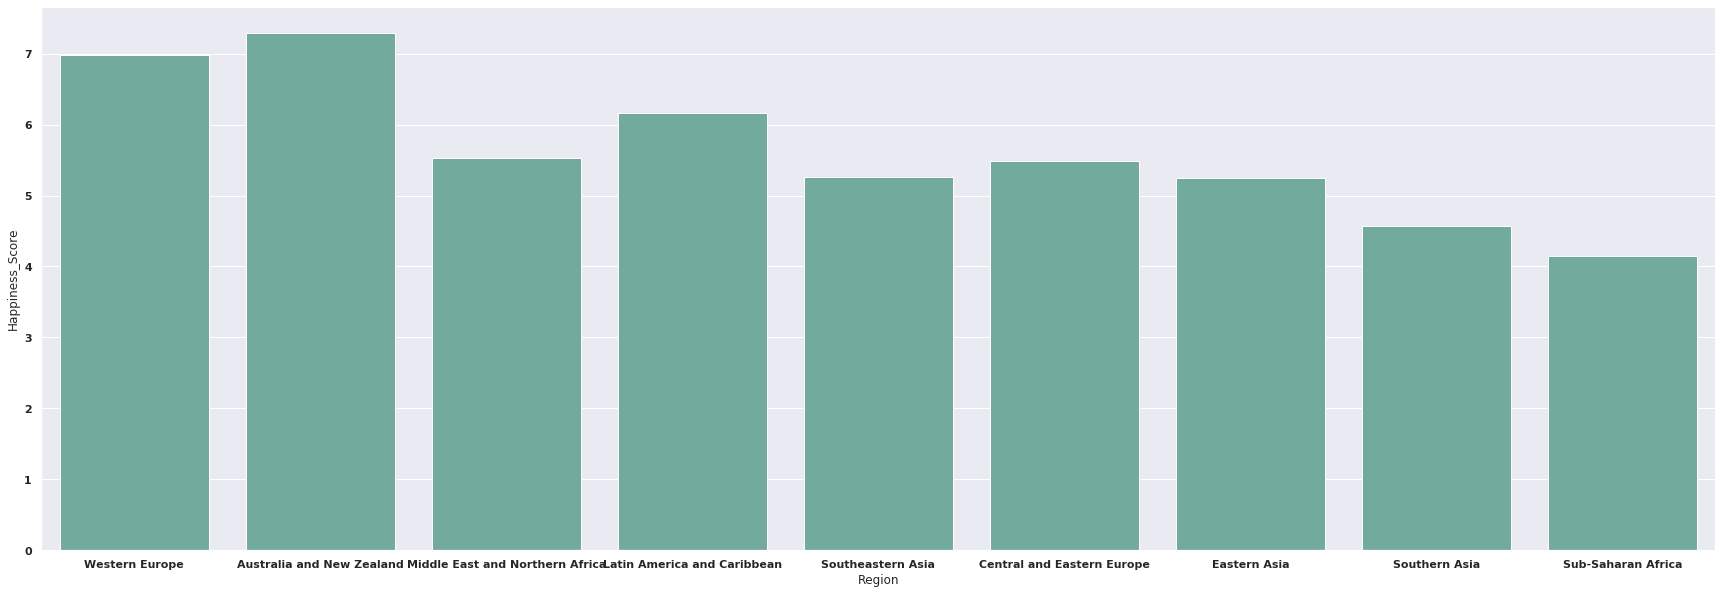

In [102]:
# import libraries
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(30, 10))

world_hap = world_hap.sort_values(['Happiness_Score'], ascending=False).reset_index(drop=True)

# plot a bar chart
sns.barplot(
    x="Region", 
    y="Happiness_Score", 
    data=world_hap, 
    estimator=np.median, 
    ci=None, 
    color='#69b3a2')

From the above table, we find that Australia, New Zealand, North America, and Western Europe are the most happy regions.

## Largest Contributor to Happiness by Region

In [103]:
world_hap_contribution = world_hap.copy()

#Maybe replace this with an apply statement
world_hap_contribution['GDP_per_Capita'] = world_hap_contribution['GDP_per_Capita'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Freedom'] = world_hap_contribution['Freedom'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Generosity'] = world_hap_contribution['Generosity'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Life_Expectancy'] = world_hap_contribution['Life_Expectancy'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Social_Support'] = world_hap_contribution['Social_Support'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Corruption'] = world_hap_contribution['Corruption'] / world_hap_contribution['Happiness_Score']

contribution_by_region = world_hap_contribution.groupby('Region').agg({'GDP_per_Capita': np.nanmean, 'Freedom': np.nanmean, 'Generosity': np.nanmean, 'Life_Expectancy': np.nanmean, 'Social_Support': np.nanmean, 'Corruption': np.nanmean})

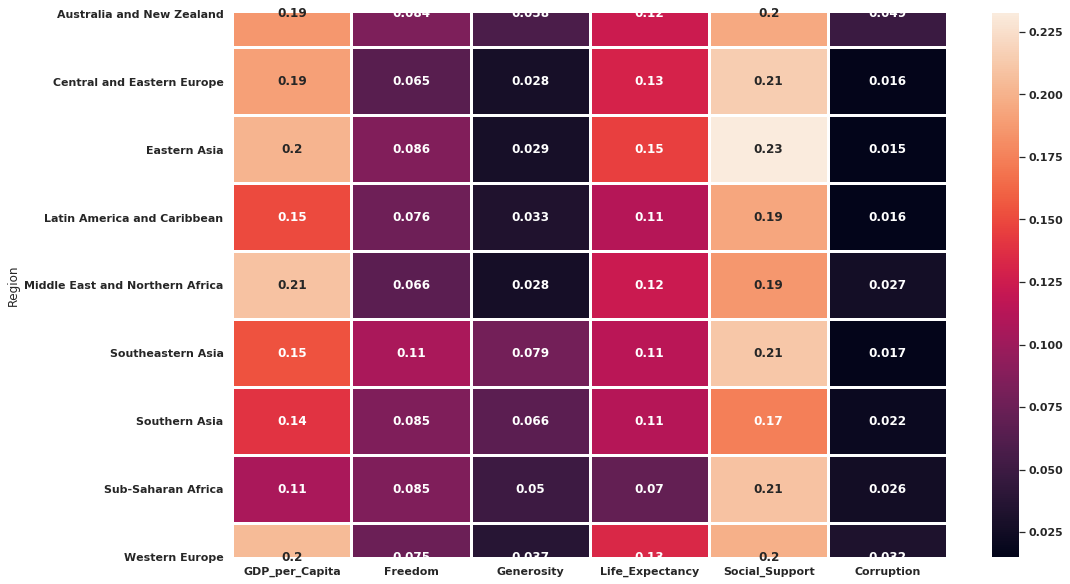

In [104]:
# plot a heatmap with annotation
plt.figure(figsize = (16,10))
sns.heatmap(contribution_by_region, annot=True, annot_kws={"size": 12}, linewidths=2)

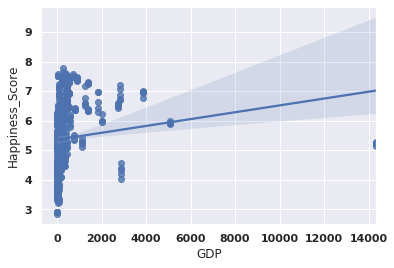

In [106]:

sns.regplot(x=world_hap["GDP"], y=world_hap["Happiness_Score"])
plt.show()

We want to find the industries that contribute the most to happiness in various countries and regions. From there, our goal is to identify any glaring trends in the relationship between GDP, industries, and happiness.

In [107]:
gdp_analysis = world_hap[['Country', 'GDP_per_Capita', 'Happiness_Score', 'year', 'Region', 'GDP', 'Agriculture', 'Industry', 'Manufacturing', 'Services']]

In [108]:
gdp_analysis.head()

,Country,GDP_per_Capita,Happiness_Score,year,Region,GDP,Agriculture,Industry,Manufacturing,Services
0,Finland,1.34000,7.769,2019-01-01,Western Europe,269.3,2.0,24.0,15.0,60.0
1,Finland,1.30500,7.632,2018-01-01,Western Europe,269.3,2.0,24.0,15.0,60.0
2,Denmark,1.38300,7.600,2019-01-01,Western Europe,350.1,1.0,21.0,13.0,64.8
3,Norway,1.45600,7.594,2018-01-01,Western Europe,403.3,2.0,29.0,6.0,57.7
4,Switzerland,1.39651,7.587,2015-01-01,Western Europe,703.1,1.0,26.0,19.0,70.9


In [109]:
gdp_analysis['GDP_Contribution'] = gdp_analysis['GDP_per_Capita'] / gdp_analysis['Happiness_Score']


gdp_analysis['Agriculture_Contribution'] = gdp_analysis['GDP_Contribution'] * (gdp_analysis['Agriculture'] / 100)
gdp_analysis['Industry_Contribution'] = gdp_analysis['GDP_Contribution'] * (gdp_analysis['Industry'] / 100)
gdp_analysis['Manufacturing_Contribution'] = gdp_analysis['GDP_Contribution'] * (gdp_analysis['Manufacturing'] / 100)
gdp_analysis['Services_Contribution'] = gdp_analysis['GDP_Contribution'] * (gdp_analysis['Services'] / 100)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [110]:
gdp_analysis.head()

,Country,GDP_per_Capita,Happiness_Score,year,Region,GDP,Agriculture,Industry,Manufacturing,Services,GDP_Contribution,Agriculture_Contribution,Industry_Contribution,Manufacturing_Contribution,Services_Contribution
0,Finland,1.34000,7.769,2019-01-01,Western Europe,269.3,2.0,24.0,15.0,60.0,0.172480,0.003450,0.041395,0.025872,0.103488
1,Finland,1.30500,7.632,2018-01-01,Western Europe,269.3,2.0,24.0,15.0,60.0,0.170991,0.003420,0.041038,0.025649,0.102594
2,Denmark,1.38300,7.600,2019-01-01,Western Europe,350.1,1.0,21.0,13.0,64.8,0.181974,0.001820,0.038214,0.023657,0.117919
3,Norway,1.45600,7.594,2018-01-01,Western Europe,403.3,2.0,29.0,6.0,57.7,0.191730,0.003835,0.055602,0.011504,0.110628
4,Switzerland,1.39651,7.587,2015-01-01,Western Europe,703.1,1.0,26.0,19.0,70.9,0.184066,0.001841,0.047857,0.034973,0.130503


In [111]:
gdp_analysis_copy = gdp_analysis.copy()

gdp_analysis_copy = gdp_analysis_copy[gdp_analysis_copy['year'] == '2019-01-01']
gdp_analysis_copy.drop(['Agriculture', 'Manufacturing', 'Services', 'Industry', 'year', 'GDP_per_Capita'], inplace=True, axis=1)
happiness_contribution_table = pd.pivot_table(data=gdp_analysis_copy, index=['Region'])

happiness_contribution_table

,Agriculture_Contribution,GDP,GDP_Contribution,Happiness_Score,Industry_Contribution,Manufacturing_Contribution,Services_Contribution
Region,,,,,,,
Australia and New Zealand,0.007248,801.750000,0.184070,7.267500,0.041559,0.014611,0.120773
Central and Eastern Europe,0.012257,86.526087,0.185512,5.507174,0.047735,0.023636,0.101015
Eastern Asia,0.011954,6479.566667,0.201018,5.454000,0.070284,0.039003,0.111611
Latin America and Caribbean,0.010587,273.883333,0.147485,6.039944,0.038055,0.018249,0.085613
Middle East and Northern Africa,0.008363,260.992308,0.206895,5.619385,0.077583,0.026398,0.116477
Southeastern Asia,0.020870,395.614286,0.164893,5.200714,0.058186,0.033791,0.080896
Southern Asia,0.023406,512.300000,0.144474,4.526857,0.035683,0.017546,0.075222
Sub-Saharan Africa,0.018451,50.213793,0.102373,4.275724,0.026028,0.012357,0.048873
Western Europe,0.003454,942.231579,0.198668,6.907474,0.041499,0.025242,0.132691
